# Portfolio project - Fraud detection

Dataset *"Fraud Detection Example"* provided by the user *"gopalm.ai"*, available on the Kaggle platform under the link:\
https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example

The chosen dataset reproduces partial data amount generated by the [PaySim](https://github.com/EdgarLopezPhD/PaySim) simulator. This is a tool used to generate synthetical data for purposes such as our current one, where it is very difficult to find detailed and real market data with labeled columns, due to privacy reasons.

## Knowing and "collecting" the data

Importing the pandas library and the dataset

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('fraud_dataset_example.csv', on_bad_lines='warn')

Displaying and understanding the dataset's structure

In [17]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


Description of the dataset variables:

**step -** time unit. We will consider that one step means one hour, for learning purposes. There will be 10 hours in our case.\
**type -** different transaction's types ("cash-in", "cash-out", "debit", "payment" and "transfer");\
**amount -** monetary value of each transaction;\
**nameOrg -** number of the client who originated the transation;\
**oldbalanceOrig -** initial balance amount from the origin client before the transaction;\
**newbalanceOrig -** final balance amount from the origin client after the transaction;\
**nameDest -** recipient client of the transaction;\
**oldbalanceDest -** initial balance from the recipient client before the transaction;\
**newbalanceDest -** final balance from the recipient client after the transaction;\
**isFraud -** transaction generated by the fraudulent agents and validated as fraud;\
**isFlaggedFraud -** suspected transation assigned to be controled. In our study case the alert criteria is when the total transaction amount is higher than $200.000;

Reordering the columns in the dataset

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
df = df[['isFraud', 'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]

Renaming the columns for better understanding during our exploration and modelling tasks

In [23]:
new_columns = {
    'isFraud': 'fraud', 
    'isFlaggedFraud': 'suspected_fraud', 
    'step': 'time', 
    'type': 'type', 
    'amount': 'amount', 
    'nameOrig': 'client1', 
    'oldbalanceOrg': 'initial_balance_c1', 
    'newbalanceOrig': 'new_balance_c1',
    'nameDest': 'client2',
    'oldbalanceDest': 'initial_balance_c2',
    'newbalanceDest': 'new_balance_c2' 
}

In [24]:
df = df.rename(columns = new_columns)

In [25]:
df.head(3)

,fraud,suspected_fraud,time,type,amount,client1,initial_balance_c1,new_balance_c1,client2,initial_balance_c2,new_balance_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0


Getting some statistics from the dataset

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
suspected_fraud,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
time,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
amount,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
initial_balance_c1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
new_balance_c1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
initial_balance_c2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
new_balance_c2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


From the summary below we can write down some conclusions of suspects to further validate:

- There seems to be no suspected fraud case in the dataset. Therefore, we can exclude this column;
- There's no null values in any of the columns;
- There's no false or wrong register on the dataset, since all the statistics could be calculated without errors.

**Description of the statistics:**

**count -** number of valid registers in that column/variable;\
**mean -** mean of the numeric values from that column/variable;\
**std -** standard deviation of the numeric values from that column/variable;\
**min -** minimal value of the numeric values from that column/variable;\
**25% -** first quartile of the numeric values from that column/variable;\
**50% -** median of the numeric values from that column/variable;\
**75% -** third quartile of the numeric values from that column/variable;\
**max -** maximal value of the numeric values from that column/variable.


Looking at the data types and controlling if we have any null value

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fraud               101613 non-null  int64  
 1   suspected_fraud     101613 non-null  int64  
 2   time                101613 non-null  int64  
 3   type                101613 non-null  object 
 4   amount              101613 non-null  float64
 5   client1             101613 non-null  object 
 6   initial_balance_c1  101613 non-null  float64
 7   new_balance_c1      101613 non-null  float64
 8   client2             101613 non-null  object 
 9   initial_balance_c2  101613 non-null  float64
 10  new_balance_c2      101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


We can see here some null value as well as some variables having the wrong data types. Let's fix it.

In [33]:
df.isnull().values.any()

False

In [34]:
df.dropna(inplace=True)

In [35]:
df['fraud'] = df['fraud'].astype('int64')
df['suspected_fraud'] = df['suspected_fraud'].astype('int64')
df['amount'] = df['amount'].astype('float64')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fraud               101613 non-null  int64  
 1   suspected_fraud     101613 non-null  int64  
 2   time                101613 non-null  int64  
 3   type                101613 non-null  object 
 4   amount              101613 non-null  float64
 5   client1             101613 non-null  object 
 6   initial_balance_c1  101613 non-null  float64
 7   new_balance_c1      101613 non-null  float64
 8   client2             101613 non-null  object 
 9   initial_balance_c2  101613 non-null  float64
 10  new_balance_c2      101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


From the results above, we can write down some conclusions:

- We confirmed that there's no null values in any of the columns;
- There are three columns with data from the dtype 'object', which means tha we need to encode or eliminate them from the dataset;
- For the variable 'type', we decide to encode the data because it is very relevant for our analysis. The other two variables will be eliminated.

In [38]:
df['fraud'].value_counts()

fraud
0    101497
1       116
Name: count, dtype: int64

When investigating about the class imbalance for he target variable we discovered above the it is very imbalanced. It means very likely that we'll need to perform class balancing to achieve better results on the model predictions. Let's check that in the coming tasks.

## Exploratory data analysis

Evaluating the data distribution for each variable

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Fraud / Not fraud**

In [44]:
fraud = df['fraud'].astype(int).value_counts()
fraud

fraud
0    101497
1       116
Name: count, dtype: int64

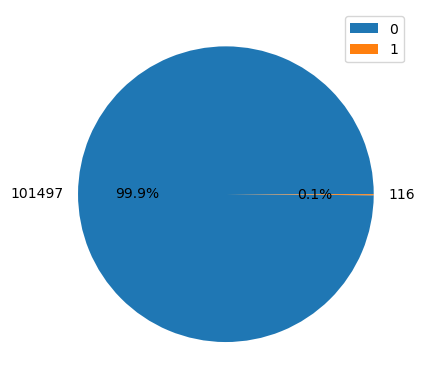

In [45]:
fig, ax = plt.subplots()
ax.pie(fraud, labels=fraud, autopct='%1.1f%%');
ax.legend(df['fraud'].unique());

From the piechart above about the occurance of ***frauds***, we can see and confirm that the target variable of the dataset is exetremely unbalanced (99,9 x 0,1%). That means we have a rare occurance target and will need to perform under- or oversampling.

**Suspected fraud / Not suspected fraud (for values higher than 200.000€)**

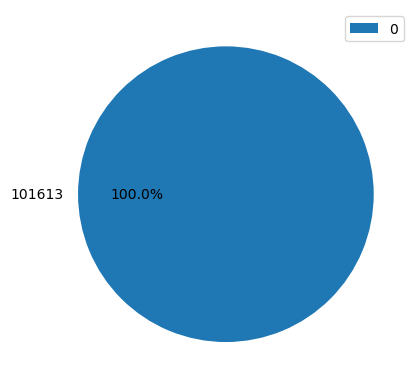

In [48]:
suspected_fraud = df['suspected_fraud'].astype(int).value_counts()
fig, ax = plt.subplots()
ax.pie(suspected_fraud, labels=suspected_fraud, autopct='%1.1f%%');
ax.legend(df['suspected_fraud'].unique());

From the piechart above about the occurance of ***suspected frauds*** (transactions over $200.000), we can see and confirm that there'n no registers of that, wich means that we can exclude this variable from our analysis.

**Time steps from the initial counting time point (hours, in our example)**

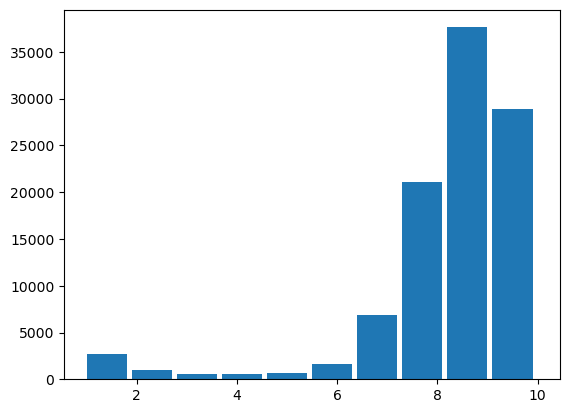

In [51]:
fig, ax = plt.subplots()
ax.hist(df['time'], width=0.8, align='mid');

From the histogram above from the variable ***time***, we can assume that the biggest share of the transactions were made inside a narrow time frame.

**Payment type**

In [54]:
type = df['type'].value_counts()
type

type
PAYMENT     40062
CASH_OUT    31310
CASH_IN     20540
TRANSFER     8689
DEBIT        1012
Name: count, dtype: int64

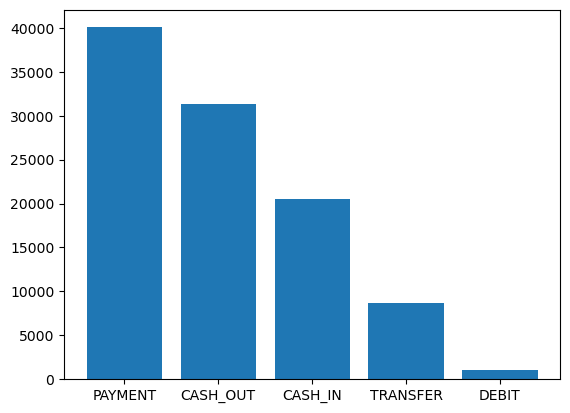

In [55]:
fig, ax = plt.subplots()
ax.bar(type.index, type);

From the barchart above from the variable ***type*** we can see clearly that there's a tendency for payments to be performed more using credit cards or cash. It does not brings us already too big intuitions about relationships between the payment method and the occurrance of fraud.

## Applying encoding method

Encoding types: \
**Label Encoding** - replace the existing categorical classes with numerical values from 1 to n, according to the variables quantity. Usually not recommended when there is no natural hierarchy among the classes.\
**One-Hot Encoding** - transform the n existing classes in n numerical binary columns. When that register belong to a certain class, its new correspondent column will have a value of 1, otherwise 0;

In [59]:
df = pd.get_dummies(data=df, columns=['type'], prefix_sep=':', dtype='int')     

Removing the non important columns for our coming modeling tasks

In [61]:
df = df.drop(['client1', 'client2', 'suspected_fraud'], axis=1)

In [62]:
df.head(3)

,fraud,time,amount,initial_balance_c1,new_balance_c1,initial_balance_c2,new_balance_c2,type:CASH_IN,type:CASH_OUT,type:DEBIT,type:PAYMENT,type:TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1


Now let's draw a heatmap with the numeric values in each cell, containing the correlations between the different variables

In [64]:
corr = df.corr(method='pearson', )

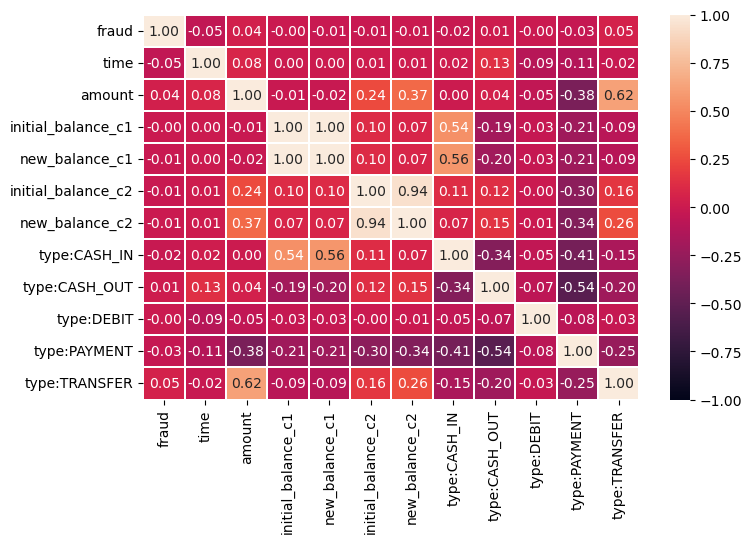

In [65]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(corr, annot=True, linewidths=.2, vmin=-1, vmax=1, fmt=".2f")

Some comments and assumptions from the correlation matrix / heatmap:

* The target variable *fraud* has no strong relationship with any of the other input variables;
* When assessing the correlation indexes with *fraud*, even if very low, the most significant correlations are with the variables *time* and *type:TRANSFER*;
* We can see a strong correlation (0.63) between amount and *type:TRANSFER*, meaning that the most valuable transactions are used performed with transfers;
* We will make no deep assesments inside the scope of the transaction types;

Obviously, from the fact that the dataset is very unbalanced, the conclusions and evaluations we can make from the correlation matrix are very limited.

## Modeling the fraud detection - 1st Model - Logistic Regression

Logistic regression is a supervised learning algorithm used for binary classification. It predicts the probability that an input belongs to a specific class by modeling the relationship between features and the target using a logistic (sigmoid) function. The output is a probability, typically thresholded to classify data into two categories.

In our case case it will be applied to calculate whether an specific bank transaction should be a fraud or not, as already described enabling us to have a binary output or event a probability.

<img width='600px' src='logistic_regression.png' align='middle'>

*Image source: Data Mining Map*

Importing the libraries

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

seed = 42

Splitting the dataset

In [73]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = seed) 

Instantiating the logistic regression model

In [76]:
lr = LogisticRegression(max_iter = 1000, random_state = seed)

Fitting the model to the data

In [78]:
model_lr = lr.fit(X_train, y_train)

Predicting the y values

In [80]:
y_pred = model_lr.predict(X_test)

## Model evaluation - Logistic Regression

**Evaluation metrics**

In [83]:
print('Accuracy:',round(metrics.accuracy_score(y_test, y_pred),5))
print('Precision:',round(metrics.precision_score(y_test, y_pred),5))
print('Recall:',round(metrics.recall_score(y_test, y_pred),5))
print('F1 Score:',round(metrics.f1_score(y_test, y_pred),5))

Accuracy: 0.99898
Precision: 0.8
Recall: 0.13793
F1 Score: 0.23529


When evaluating the model performance metrics for the Logistic Regression we can clearly see that it performs very poorly on the Recaal, which is a very important metric for us (if not the most important).

**Confusion matrix**

Importing the libraries

In [87]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

Instantiating, formating and displying the confusion matrix

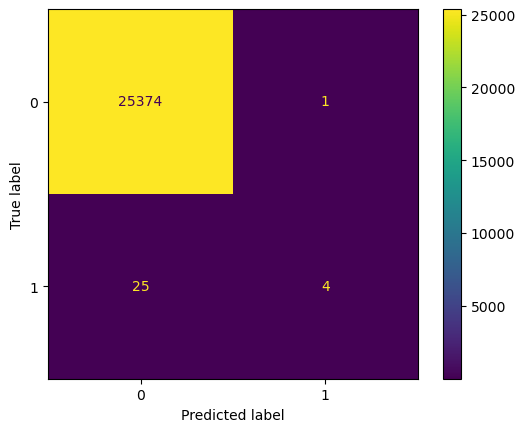

In [89]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

From the 33 positive fraud registers, we predicted 29 as not fraud and 4 as fraud. Very poor result.

**ROC and AUC**

Calculating the metrics

In [93]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

Instantiating, formating and displying the ROC

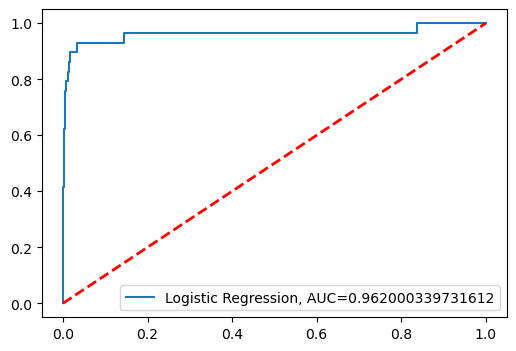

In [95]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(fpr, tpr, label = 'Logistic Regression, AUC='+str(auc));
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--');
plt.legend(loc = 4);

The ROC shows to be not really high and beyond that has a very abrupt progress at some of the evaluated thresholds.

## Balancing classes

We have two possibilities to perform the class balance:\
**Undersampling** - Reduce the number of registers from the prevalent class. Not the ideal because we would run into too few registers for an adequate and robust model training, with just 116 registers for each class;\
**Oversampling** - Copy the data from the minor class and create new and synthetical registers based on the existing ones, using some Support Vector Machines algorithm techniques. Will be our choice in this case, considering we are running already with synthetical data. But it is very important to keep in my that this approach would be not recommendable in case of using real private bank data (to mix it with synthetical generated data would be harmful for the whole analysis and its affidability;

In [99]:
!pip install -U imbalanced-learn

The -U signal means we'd line to download and install the very last released version the the library

In [101]:
from imblearn.over_sampling import SMOTE #SMOTE is exactly the technique we've explained above which uses the SVM algorithm

Instantiating the oversampling method and splitting again the dataset

In [103]:
smote = SMOTE(random_state = seed)

In [104]:
X = df.drop('fraud', axis=1)
y = df['fraud']

Generating the new oversampled data

In [106]:
X_resampled, y_resampled = smote.fit_resample(X, y)

Concatenating the new generated data into a balance new dataset for our task

In [108]:
df_balanced = pd.concat([X_resampled, y_resampled], axis = 1)
df_balanced

,time,amount,initial_balance_c1,new_balance_c1,initial_balance_c2,new_balance_c2,type:CASH_IN,type:CASH_OUT,type:DEBIT,type:PAYMENT,type:TRANSFER,fraud
0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0,0
1,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0,0
2,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1,1
3,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0,1
4,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1,1
202990,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1,1
202991,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0,1
202992,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1,1


Checking for the correctness of the oversampling

In [110]:
df_balanced.fraud.value_counts()

fraud
0    101497
1    101497
Name: count, dtype: int64

Good, the sharing now from each target output is the same for both causes fraud or not fraud.

## Re-running the Logistic Regression w/ model evaluation

Let's rerun the logistic regression, nbut ow with the balanced output class

In [114]:
X_bal = df_balanced.drop('fraud', axis=1)
y_bal = df_balanced['fraud']

In [115]:
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size = 0.25, random_state = seed) 

In [116]:
lr_bal = LogisticRegression(max_iter = 1000, random_state = seed)

In [117]:
model_lr_bal = lr_bal.fit(X_bal_train, y_bal_train)

In [118]:
y_bal_pred = model_lr_bal.predict(X_bal_test)

**Evaluation metrics**

In [120]:
print('Accuracy:',round(metrics.accuracy_score(y_bal_test, y_bal_pred),5))
print('Precision:',round(metrics.precision_score(y_bal_test, y_bal_pred),5))
print('Recall:',round(metrics.recall_score(y_bal_test, y_bal_pred),5))
print('F1 Score:',round(metrics.f1_score(y_bal_test, y_bal_pred),5))

Accuracy: 0.95572
Precision: 0.95303
Recall: 0.95856
F1 Score: 0.95579


**Confusion matrix**

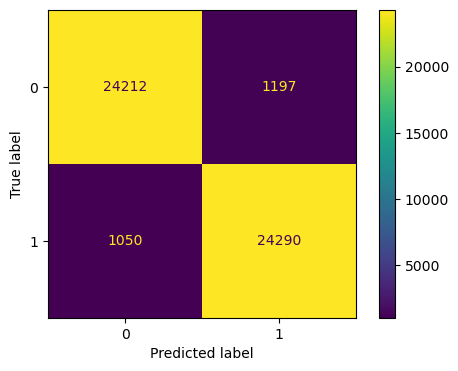

In [122]:
cm = confusion_matrix(y_bal_test, y_bal_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

Now the metric's results and the confusion matrix, showing us the proportion of real frauds which were correctly detected are much better.

**ROC and AUC**

In [125]:
y_bal_pred_proba = model_lr_bal.predict_proba(X_bal_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_bal_test, y_bal_pred_proba)
auc = metrics.roc_auc_score(y_bal_test, y_bal_pred_proba)

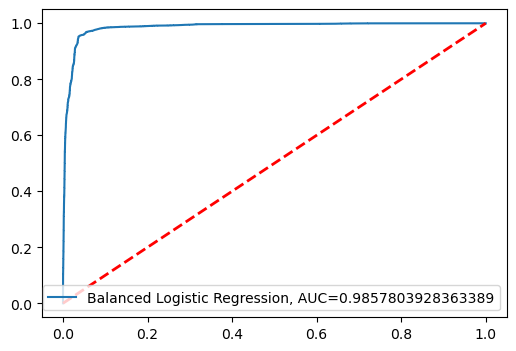

In [126]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(fpr, tpr, label = 'Balanced Logistic Regression, AUC='+str(auc))
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--')
plt.legend(loc = 4);

Also in the case of the ROC we can use it performs very better and has much lighter and more predictable results when evaluating different thresholds.

## Modeling the fraud detection - 2nd Model - Decision Tree

A decision tree is a supervised learning algorithm used for classification and regression. It splits data into subsets based on feature values, creating a tree-like structure (upside down) with decision nodes and leaf nodes. The goal is to model decisions in a way that maximizes information gain or minimizes impurity at each split (reflecting best effective spliting criteria).

<img width='600px' src='decision_tree.png' align='middle'>

*Image source: Devopedia*

Importing the necessary libraries

In [132]:
from sklearn.tree import DecisionTreeClassifier

Instantiating and fitting the model and predicting on the test data

In [134]:
dt = DecisionTreeClassifier(max_depth=5, random_state=seed)

In [135]:
model_dt = dt.fit(X_bal_train, y_bal_train)

In [136]:
y_bal_pred = model_dt.predict(X_bal_test)

## Model evaluation - Decision Tree

**Model metrics**

In [139]:
print('Accuracy:',round(metrics.accuracy_score(y_bal_test, y_bal_pred),5))
print('Precision:',round(metrics.precision_score(y_bal_test, y_bal_pred),5))
print('Recall:',round(metrics.recall_score(y_bal_test, y_bal_pred),5))
print('F1 Score:',round(metrics.f1_score(y_bal_test, y_bal_pred),5))

Accuracy: 0.96228
Precision: 0.93816
Recall: 0.9897
F1 Score: 0.96324


Here we've won some performance on the Precision but on the other hand on the Recall we've performed much better (which is the most important metric our use case).

**Confusion matrix**

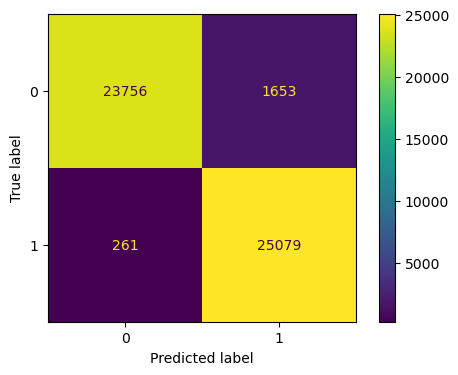

In [142]:
cm = confusion_matrix(y_bal_test, y_bal_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

**ROC and AUC Score**

In [144]:
y_bal_pred_proba = model_dt.predict_proba(X_bal_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_bal_test, y_bal_pred_proba)
auc = metrics.roc_auc_score(y_bal_test, y_bal_pred_proba)

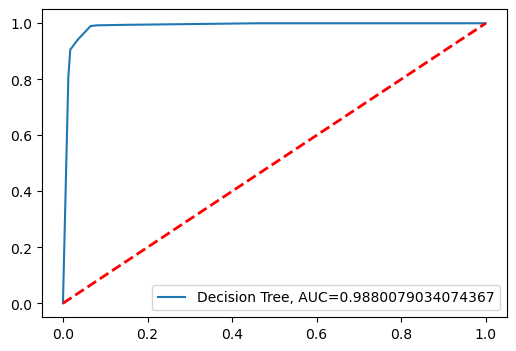

In [145]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(fpr, tpr, label = 'Decision Tree, AUC='+str(auc))
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--')
plt.legend(loc = 4);

## Modeling the fraud detection - 3rd Model - Random Forest

Random Forest is an ensemble learning algorithm (group of other algorithms) used for classification and regression. It builds multiple decision trees on random subsets of data and features, then combines their outputs (via averaging, for regression tasks, or majority voting, for classification tasks) to improve accuracy and reduce overfitting. It leverages the power of aggregation for robust predictions.

<img width='600px' src='random_forest.png' align='middle'>

*Image source: Spotfire*

Importing the necessary libraries

In [150]:
from sklearn.ensemble import RandomForestClassifier

Instantiating and fitting the model and predicting on the test data

In [152]:
rf = RandomForestClassifier(max_depth=5, random_state=seed) #Here we have intentionally not changed the "n_estimators", because we agree to use the standard quantity of 100

In [153]:
model_rf = rf.fit(X_bal_train, y_bal_train)

In [154]:
y_bal_pred = model_rf.predict(X_bal_test)

## Model evaluation - Random Forest

Evaluating the model metrics

In [157]:
print('Accuracy:',round(metrics.accuracy_score(y_bal_test, y_bal_pred),5))
print('Precision:',round(metrics.precision_score(y_bal_test, y_bal_pred),5))
print('Recall:',round(metrics.recall_score(y_bal_test, y_bal_pred),5))
print('F1 Score:',round(metrics.f1_score(y_bal_test, y_bal_pred),5))

Accuracy: 0.97237
Precision: 0.97052
Recall: 0.97427
F1 Score: 0.97239


Creating and displying the confusion matrix

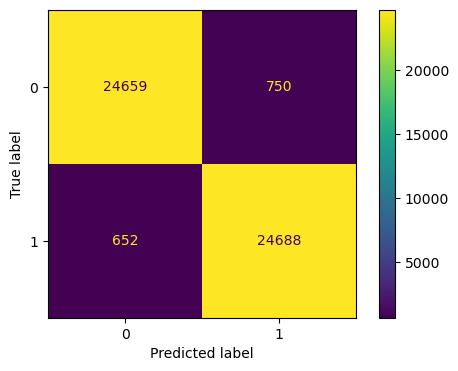

In [159]:
cm = confusion_matrix(y_bal_test, y_bal_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

Creating and displaying the ROC and AUC Score

In [161]:
y_bal_pred_proba = model_rf.predict_proba(X_bal_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_bal_test, y_bal_pred_proba)
auc = metrics.roc_auc_score(y_bal_test, y_bal_pred_proba)

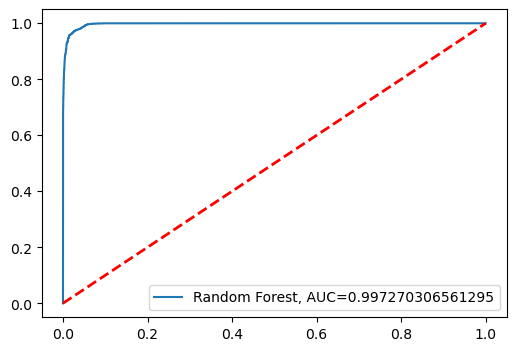

In [162]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(fpr, tpr, label = 'Random Forest, AUC='+str(auc))
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--')
plt.legend(loc = 4)

Here once again we can see that this new model performed better than the other two previusly trained.

## Model evaluation - Comparing the three models

Here we will create a for *loop* to better and more concisely present the metrics results from all models

In [166]:
classifiers = [
    LogisticRegression(max_iter = 1000, random_state = seed),
    DecisionTreeClassifier(max_depth=5, random_state=seed),
    RandomForestClassifier(max_depth=5, random_state=seed)]

In [167]:
metrics_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=['Logistic Reg.', 'Decision Tree', 'Random Forest'], data=0, dtype='float64')

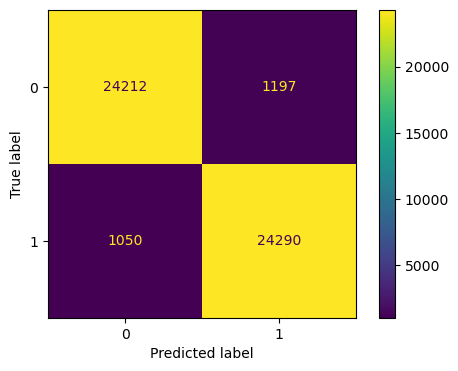

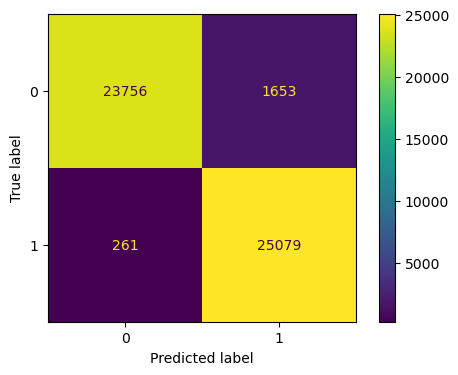

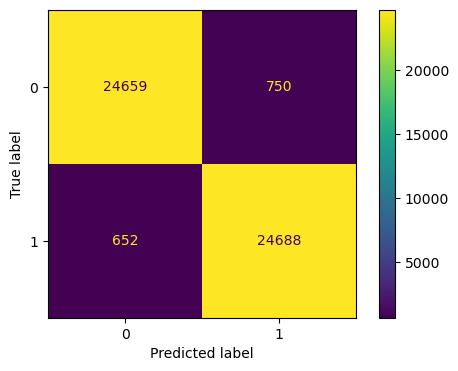

In [168]:
count = 0
for clf in classifiers:
    metrics_values = []  # Reset at the start of each loop
    clf.fit(X_bal_train, y_bal_train)
    y_bal_pred = clf.predict(X_bal_test)

    metrics_values.append(metrics.accuracy_score(y_bal_test, y_bal_pred))
    metrics_values.append(metrics.precision_score(y_bal_test, y_bal_pred))
    metrics_values.append(metrics.recall_score(y_bal_test, y_bal_pred))
    metrics_values.append(metrics.f1_score(y_bal_test, y_bal_pred))

    metrics_df.iloc[count] = metrics_values
    count += 1

    cm = confusion_matrix(y_bal_test, y_bal_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

Now let's try to summarize in a table and in a multi chart schema all the metrics results we've reached until now, to ease our understanding and enabling us to better compare the model's performances.

In [170]:
display(metrics_df)

,Accuracy,Precision,Recall,F1 Score
Logistic Reg.,0.955723,0.953035,0.958564,0.955791
Decision Tree,0.962285,0.938164,0.989700,0.963243
Random Forest,0.972374,0.970517,0.974270,0.972390


[Text(0, 0, 'Logistic Reg.'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Random Forest')]

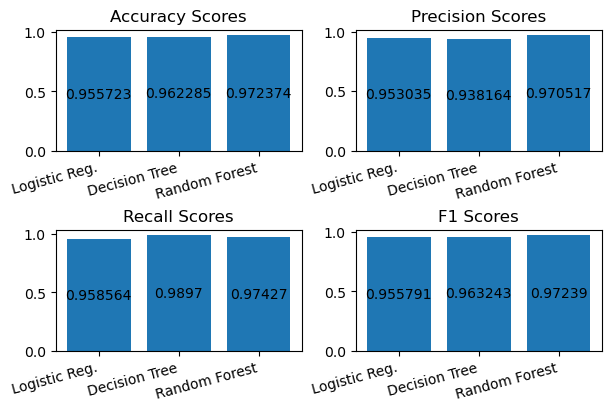

In [291]:
fig, ax = plt.subplots(2, 2, layout='constrained',)

ax1 = ax[0][0]
cont1 = ax1.bar(x=metrics_df.index, height=metrics_df['Accuracy'])
ax1.set_title('Accuracy Scores')
ax1.bar_label(container=cont1, label_type='center')
ax1.set_xticklabels(metrics_df.index, rotation=15, ha='right')

ax2 = ax[0][1]
cont2 = ax2.bar(x=metrics_df.index, height=metrics_df['Precision'])
ax2.set_title('Precision Scores')
ax2.bar_label(container=cont2, label_type='center')
ax2.set_xticklabels(metrics_df.index, rotation=15, ha='right')

ax3 = ax[1][0]
cont3 = ax3.bar(x=metrics_df.index, height=metrics_df['Recall'])
ax3.set_title('Recall Scores')
ax3.bar_label(container=cont3, label_type='center')
ax3.set_xticklabels(metrics_df.index, rotation=15, ha='right')

ax4 = ax[1][1]
cont4 = ax4.bar(x=metrics_df.index, height=metrics_df['F1 Score'])
ax4.set_title('F1 Scores')
ax4.bar_label(container=cont4, label_type='center')
ax4.set_xticklabels(metrics_df.index, rotation=15, ha='right')

When assessing the general metrics and results, we can conclude that the Random Forest was the best performing model. The only issue about it is that the Recall Score (most important metric for our application) from the Random Forest was slightly lower than the one from the Decision Tree. Nonetheless, the Random Forest seems to be the most stable model and therefore, we will take this model to use further on our study, but trying to optimize it applying the Grid Search technique.

## Model improvement for the Random Forest with Grid Search and Cross Validation

Here we will start to implement some improvements on our best general performing model (Random Forest) using Grid Search and Cross Validation.

- Grid Search is a hyperparameter tuning technique used to find the optimal combination of hyperparameters for a machine learning model. In this case we need to pass to the GridSearch model a dictionary containing the hyperparameters to be tuned and the respective values and the model will take care itself of combining them all using all different possible arrangements and then it gives us feedback about the best performing combination;

- Cross Validation is another technique used to perform model evaluation combining the train and test data with a different approach. It is basically used to evaluate the performance of a model and to prevent overfitting.

Both are often combined to ensure that the hyperparameter tuning process is robust. This approach is known as Grid Search with Cross Validation, that means that for each combination of hyperparameters, the model is evaluated using cross-validation, and the best hyperparameters are calculated.


<img width='600px' src='cross_validation.png' align='middle'>

*Image source: Stack Overflow*

First let's stablish the parameters to be used on the Grid Search

In [698]:
n_estimators = np.arange(40, 160, step=20)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = list(np.arange(3, 8, step=1))
min_samples_split = np.arange(5, 10, step=1)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

Then we create the dictionary to pass it to the GridSearch model

In [700]:
param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

Importing the required library

In [702]:
from sklearn.model_selection import RandomizedSearchCV

Instantiating and fitting the model and predicting with test data

In [704]:
rf_for_gs = RandomForestClassifier(random_state=seed)

In [705]:
rs = RandomizedSearchCV(rf_for_gs, param_grid, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=seed)
# n_jobs=-1 means we want to run the maximal possible numbers of processors in parallel

"In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter." [Scikit Learn Official Website](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [707]:
%%time
model_gs = rs.fit(X_bal_train, y_bal_train)

CPU times: total: 13.1 s
Wall time: 1min 13s


Looking at the general results and best resulting parameters of the GridSearch

In [709]:
pd.DataFrame(rs.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023374,0.005358,0.000000,0.000000,80,8,2,auto,6,gini,True,"{'n_estimators': 80, 'min_samples_split': 8, '...",NaN,NaN,NaN,NaN,NaN,9
1,24.282072,0.505533,0.654910,0.096391,80,8,4,log2,7,entropy,False,"{'n_estimators': 80, 'min_samples_split': 8, '...",0.989601,0.987237,0.986607,0.987815,0.001289,1
2,10.948223,0.233996,0.403723,0.075849,40,6,1,sqrt,7,entropy,False,"{'n_estimators': 40, 'min_samples_split': 6, '...",0.979634,0.979161,0.980934,0.979910,0.000750,4


In [710]:
rs.best_params_

{'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'entropy',
 'bootstrap': False}

Applying the best parameters to the model to fit and predict it again

In [712]:
rf_opt = RandomForestClassifier(**rs.best_params_, random_state=seed)

In [713]:
model_rf_opt = rf_opt.fit(X_bal_train, y_bal_train)

In [714]:
y_bal_pred = rf_opt.predict(X_bal_test)

## Model evaluation - Optimized Random Forest

**Evaluation metrics**

In [717]:
print('Accuracy:',round(metrics.accuracy_score(y_bal_test, y_bal_pred),5))
print('Precision:',round(metrics.precision_score(y_bal_test, y_bal_pred),5))
print('Recall:',round(metrics.recall_score(y_bal_test, y_bal_pred),5))
print('F1 Score:',round(metrics.f1_score(y_bal_test, y_bal_pred),5))  

Accuracy: 0.98589
Precision: 0.9853
Recall: 0.98646
F1 Score: 0.98588


**Confusion Matrix**

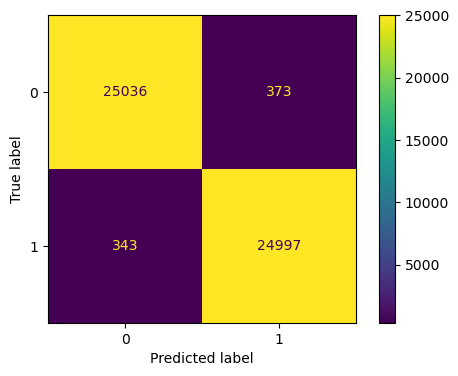

In [719]:
cm = confusion_matrix(y_bal_test, y_bal_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

**ROC and AUC Score**

In [721]:
y_bal_pred_proba = model_rf.predict_proba(X_bal_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_bal_test, y_bal_pred_proba)
auc = metrics.roc_auc_score(y_bal_test, y_bal_pred_proba)

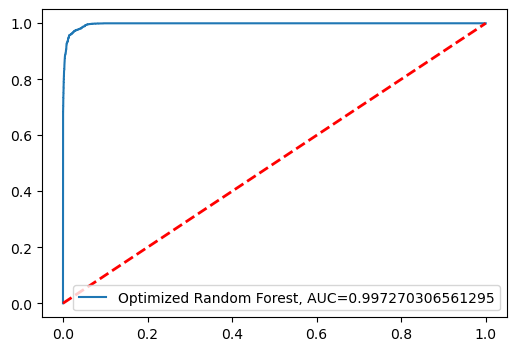

In [722]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(fpr, tpr, label = 'Optimized Random Forest, AUC='+str(auc));
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--');
plt.legend(loc = 4);

## Conclusions and recommendations

Pendencias:

- Criar subplot com as matrizes de confusao